## Визуализация для временного ряда

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

In [3]:
data.head(10)

,PJME_MW
Datetime,
2018-01-01,964585.0
2018-01-02,999056.0
2018-01-03,980466.0
2018-01-04,985560.0
2018-01-05,1060747.0
2018-01-06,1045578.0
2018-01-07,1011833.0
2018-01-08,967216.0
2018-01-09,848097.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2018-01-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [5]:
data.describe()

,PJME_MW
count,1.810000e+02
mean,7.403635e+05
std,1.007022e+05
min,5.650060e+05
25%,6.699620e+05
50%,7.233800e+05
75%,7.879180e+05
max,1.060747e+06


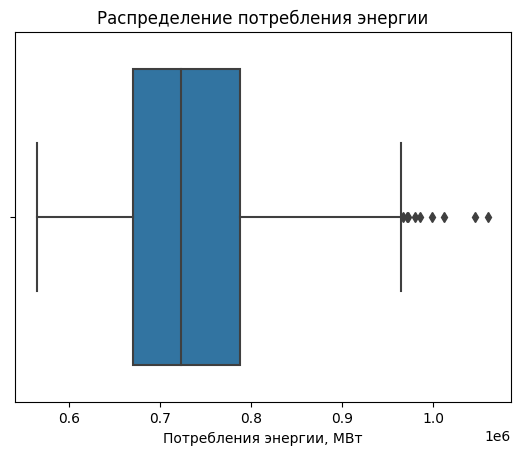

In [15]:
sns.boxplot(
    data=data,
    x='PJME_MW'
)
plt.title('Распределение потребления энергии')
plt.xlabel('Потребления энергии, МВт')
plt.show()

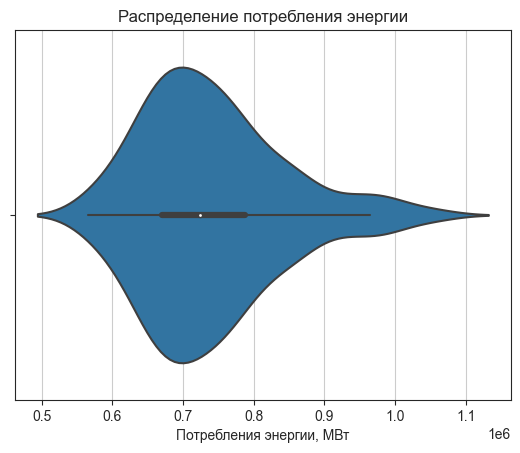

In [26]:
sns.violinplot(
    data=data,
    x='PJME_MW'
)
plt.title('Распределение потребления энергии')
plt.xlabel('Потребления энергии, МВт')
plt.show()

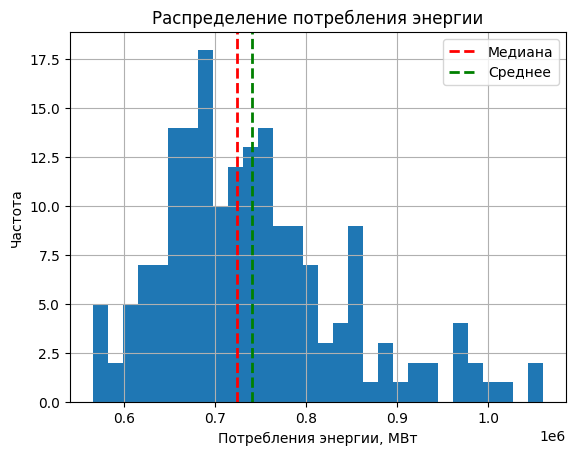

In [18]:
data['PJME_MW'].hist(
    bins=30,
    grid=True
)
plt.axvline(data['PJME_MW'].median(), color='r', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(data['PJME_MW'].mean(), color='g', linestyle='dashed', linewidth=2, label='Среднее')
plt.title('Распределение потребления энергии')
plt.xlabel('Потребления энергии, МВт')
plt.ylabel('Частота')
plt.legend()
plt.show()

### Анализ трендов, сезонностей и остатков

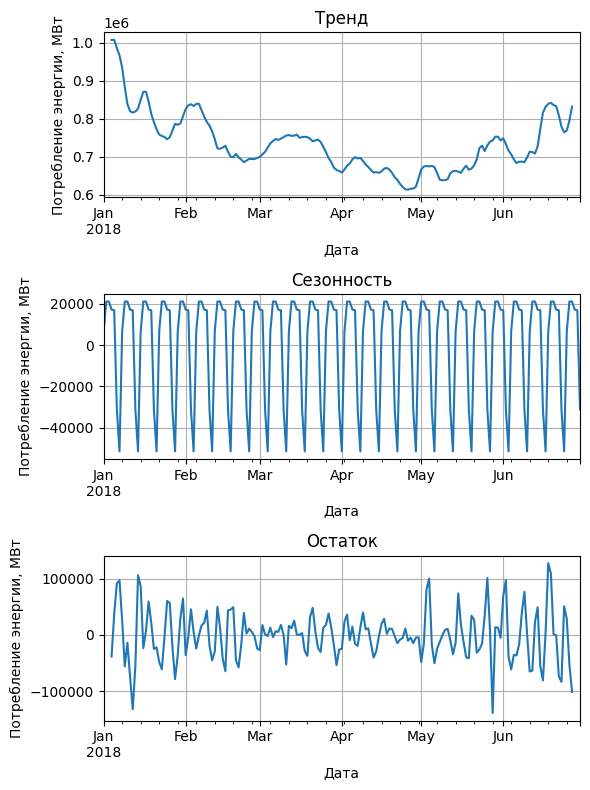

In [6]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(6, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Потребление энергии, МВт')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Потребление энергии, МВт')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Потребление энергии, МВт')

plt.tight_layout()

Тренд связан с тем, что зимой и летом расход выше, чем весной и осенью. Сезонность меньше чем месяц, так как еще зависит от выходных.

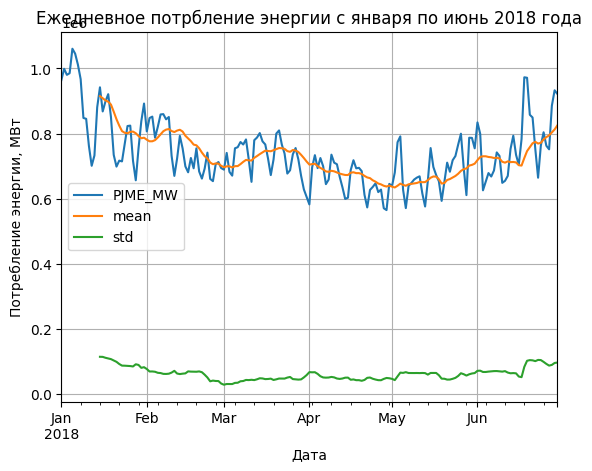

In [7]:
data = pd.read_csv('energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot(
    title='Ежедневное потрбление энергии с января по июнь 2018 года',
    xlabel='Дата',
    ylabel='Потребление энергии, МВт',
    grid=True
)
plt.show()

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = data['PJME_MW'],
                    x = data.index,
                    line = dict(color = 'blue', width = 2),
                    name = 'Потребление энергии'))

fig.add_trace(go.Scatter(y = data['mean'],
                    x = data.index,
                    line=dict(color='red', width=2,dash='dash'),
                    name = 'Скользящее среднее'))

fig.add_trace(go.Scatter(y=data['std'],
                    x=data.index,
                    line = dict(color = 'green', width = 2),
                    name='Скользящее СКО'))

fig.update_layout(title='Ежедневное потрбление энергии с января по июнь 2018 года',
                    xaxis_title='Дата',
                    yaxis_title='Потребление энергии, МВт')
fig.show()

## Датасет "Уровень удовлетворенности сотрудников"

In [9]:
df = pd.read_csv('train_job_satisfaction_rate.csv')

In [10]:
df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


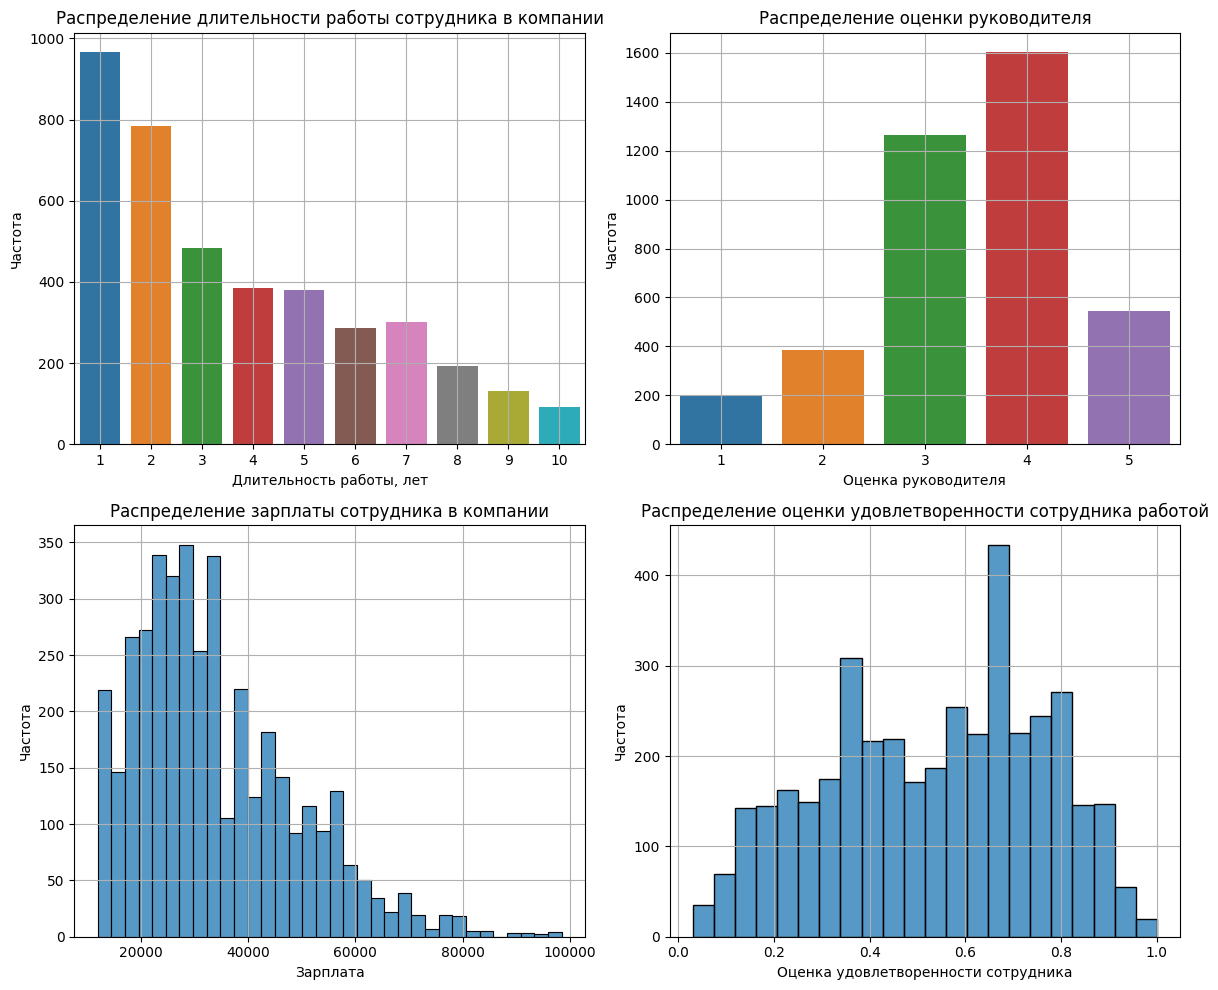

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=df, x='employment_years', ax=axs[0, 0])
axs[0, 0].set_title('Распределение длительности работы сотрудника в компании')
axs[0, 0].set_xlabel('Длительность работы, лет')
axs[0, 0].set_ylabel('Частота')
axs[0, 0].grid(True)

sns.countplot(data=df, x='supervisor_evaluation', ax=axs[0, 1])
axs[0, 1].set_title('Распределение оценки руководителя')
axs[0, 1].set_xlabel('Оценка руководителя')
axs[0, 1].set_ylabel('Частота')
axs[0, 1].grid(True)

sns.histplot(data=df, x='salary', ax=axs[1, 0])
axs[1, 0].set_title('Распределение зарплаты сотрудника в компании')
axs[1, 0].set_xlabel('Зарплата')
axs[1, 0].set_ylabel('Частота')
axs[1, 0].grid(True)

sns.histplot(data=df, x='job_satisfaction_rate', ax=axs[1, 1])
axs[1, 1].set_title('Распределение оценки удовлетворенности сотрудника работой')
axs[1, 1].set_xlabel('Оценка удовлетворенности сотрудника')
axs[1, 1].set_ylabel('Частота')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [19]:
fig = px.pie(df, names='dept', title='Отделы компании')
fig.show()

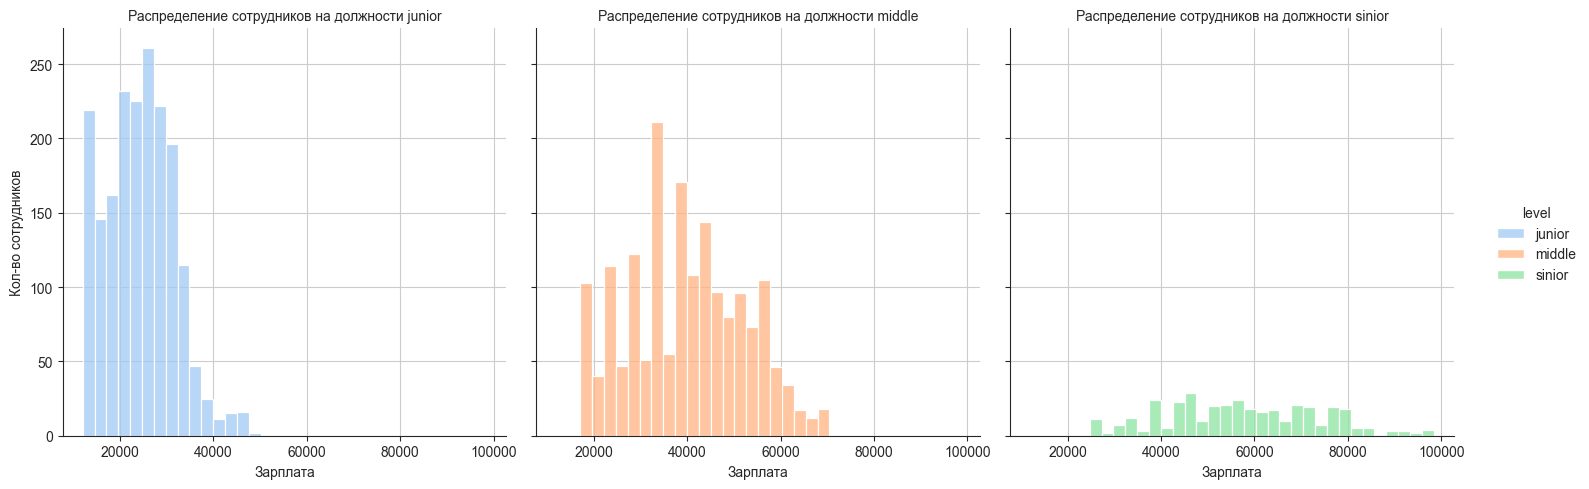

In [25]:
g = sns.displot(
    data=df,
    x='salary',
    hue='level',
    col='level',
    palette='pastel',
)
sns.set_style("ticks",{'axes.grid' : True})
g.set_axis_labels("Зарплата", "Кол-во сотрудников")
g.set_titles("Распределение сотрудников на должности {col_name}")
plt.show()